<a href="https://colab.research.google.com/github/Chris12C/Chen123/blob/main/Real_Time_Online_Learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This real-time online learning model is to create the real-time MLP model for predicting relevant risk caused by bubble formation or collapse in the pipeline based on bubble behavior and other hydrualic parameters

In [ ]:
import csv
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from six import StringIO
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.tree import plot_tree
from collections import Counter
from imblearn.over_sampling import SMOTE



#Load the origin file and get origin dataset

In [ ]:
def load_data(path, vec=None):
    # 读取原数据文件
    allElectronicsData = open(path, 'r',encoding='ISO-8859-1')
    reader = csv.reader(allElectronicsData) # 按行读取内容
    reader = csv.reader(_.replace('\x00','')for _ in allElectronicsData)
    headers=next(reader) #读取第一行的标题

    # 对数据进行预处理，转换为字典形式
    featureList = []
    labelList = []

    # 将每一行的数据编程字典的形式存入列表
    for row in [rows for rows in reader]:
        labelList.append(row[len(row) - 1]) # 存入目标结果的数据最后一列的
        rowDict = {}
        for i in range(1, len(row) - 1):
            rowDict[headers[i]] = row[i]
        featureList.append(rowDict)

    # 将原始数据转换成矩阵数据
    if vec is None:
        vec=DictVectorizer()
        vec.fit(featureList)
    
    dummyX=vec.transform(featureList).toarray() # 将参考的列转化维数组
    print('Shape of dummyX:'+str(dummyX.shape[0])+','+str(dummyX.shape[1]))
    print('Feature names', vec.get_feature_names())
    # 将要预测的列转化为数组
    lb=preprocessing.LabelBinarizer()
    dummyY=lb.fit_transform(labelList)
    print('Shape of dummyY:'+str(dummyY.shape[0])+','+str(dummyY.shape[1]))
    return (dummyX, dummyY, vec)

#Load origin dataset

In [ ]:
dummyX1, dummyY1, vec = load_data('OL1.csv')

Shape of dummyX:84,39
Feature names ['airventing=no', 'airventing=yes', 'averageslope=0.76', 'averageslope=1.07', 'averageslope=1.16', 'averageslope=1.26', 'averageslope=1.92', 'averageslope=2.89', 'averageslope=3.06', 'averageslope=3.17', 'averageslope=3.65', 'averageslope=4.03', 'averageslope=4.64', 'diameter=219', 'diameter=329', 'diameter=406', 'diameter=508', 'diameter=559', 'diameter=813', 'flowrate=100', 'flowrate=1000', 'flowrate=1100', 'flowrate=1150', 'flowrate=1250', 'flowrate=1300', 'flowrate=1440', 'flowrate=1500', 'flowrate=1600', 'flowrate=1700', 'flowrate=200', 'flowrate=250', 'flowrate=600', 'flowrate=800', 'flowrate=850', 'flowrate=900', 'gasblockage=no', 'gasblockage=yes', 'pigging=no', 'pigging=yes']
Shape of dummyY:84,1


c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#SMOTE 算法解决原始不平衡数据
#oversample = SMOTE(random_state=100)
#dummyX1, dummyY1 = oversample.fit_resample(dummyX1,dummyY1)

#Load updated dataset_1

In [ ]:
dummyX2, dummyY2, _= load_data('OL2.csv', vec)

Shape of dummyX:51,39
Feature names ['airventing=no', 'airventing=yes', 'averageslope=0.76', 'averageslope=1.07', 'averageslope=1.16', 'averageslope=1.26', 'averageslope=1.92', 'averageslope=2.89', 'averageslope=3.06', 'averageslope=3.17', 'averageslope=3.65', 'averageslope=4.03', 'averageslope=4.64', 'diameter=219', 'diameter=329', 'diameter=406', 'diameter=508', 'diameter=559', 'diameter=813', 'flowrate=100', 'flowrate=1000', 'flowrate=1100', 'flowrate=1150', 'flowrate=1250', 'flowrate=1300', 'flowrate=1440', 'flowrate=1500', 'flowrate=1600', 'flowrate=1700', 'flowrate=200', 'flowrate=250', 'flowrate=600', 'flowrate=800', 'flowrate=850', 'flowrate=900', 'gasblockage=no', 'gasblockage=yes', 'pigging=no', 'pigging=yes']
Shape of dummyY:51,1


c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Load updated dataset_2

In [ ]:
dummyX3, dummyY3, _= load_data('OL3.csv', vec)

Shape of dummyX:51,39
Feature names ['airventing=no', 'airventing=yes', 'averageslope=0.76', 'averageslope=1.07', 'averageslope=1.16', 'averageslope=1.26', 'averageslope=1.92', 'averageslope=2.89', 'averageslope=3.06', 'averageslope=3.17', 'averageslope=3.65', 'averageslope=4.03', 'averageslope=4.64', 'diameter=219', 'diameter=329', 'diameter=406', 'diameter=508', 'diameter=559', 'diameter=813', 'flowrate=100', 'flowrate=1000', 'flowrate=1100', 'flowrate=1150', 'flowrate=1250', 'flowrate=1300', 'flowrate=1440', 'flowrate=1500', 'flowrate=1600', 'flowrate=1700', 'flowrate=200', 'flowrate=250', 'flowrate=600', 'flowrate=800', 'flowrate=850', 'flowrate=900', 'gasblockage=no', 'gasblockage=yes', 'pigging=no', 'pigging=yes']
Shape of dummyY:51,1


c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 分离测试组he训练组
X_train, X_test, y_train, y_test = train_test_split(
    dummyX1, dummyY1, test_size=0.1, shuffle=True
)

#Training origin MLP model for classification applying origin dataset

In [ ]:
# 创建 MLP
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp = mlp.fit(X_train, y_train)
pred_m =  mlp.predict_proba(X_test)
pred_mm = mlp.predict(X_test)
score_m = mlp.score(X_test,y_test)

c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#The model performance of origin model on origin dataset

In [ ]:
#测试原集结果，可推广
predicted = mlp.predict(X_test)
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier(alpha=1, max_iter=1000):
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9




#The model performance of origin model on updated dataset

In [ ]:
#测试增益集结果，可推广
predicted = mlp.predict(dummyX2)
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(dummyY2, predicted)}\n"
)

Classification report for classifier MLPClassifier(alpha=1, max_iter=1000):
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.50      0.56      0.53        16

    accuracy                           0.69        51
   macro avg       0.64      0.65      0.65        51
weighted avg       0.70      0.69      0.69        51




In [ ]:
# 大量数据时，可用 next(new_generator)反复调用生成器，节省内存
#def get_new():
#    i = 0 
#    yield dummyX1[i,:],dummyY1[i,:]
#    i = i + 1
#new_generator = get_new()  

#Analysis of The overall model performance of origin model for each time step

In [ ]:
# 测试新数据集的准确度
mlpc1 = dict()
mlpc2 = dict()
rows,columns = dummyX2.shape
for i in range(0,rows,2):
    mlp = mlp.partial_fit(dummyX2[i:i+2],dummyY2[i:i+2])
    score_m = mlp.score(X_test,y_test)
    score_mm = mlp.score(dummyX3,dummyY3)
    mlpc1[i] = mlp
    mlpc2[i] =  mlp.predict_proba(dummyX3)
    #print(score_m)
    print(score_mm)
    predicted = mlp.predict(dummyX3)
    #print(
    #    f"Classification report for classifier {mlp}:\n"
    #    f"{metrics.classification_report(dummyY3, predicted)}\n"
    #)

0.7254901960784313
0.7058823529411765
0.7058823529411765
0.7058823529411765
0.7254901960784313
0.7450980392156863
0.7450980392156863
0.7254901960784313
0.7254901960784313
0.7254901960784313
0.7450980392156863
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7450980392156863
0.7254901960784313
0.7254901960784313
0.7254901960784313
0.7254901960784313
0.7254901960784313
0.7450980392156863
0.7450980392156863
0.7450980392156863
0.7058823529411765
0.6862745098039216
0.6862745098039216


c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\christopher\appdata\local

# Compute ROC curve and ROC area for time each step

In [ ]:
# Compute ROC curve and ROC area for time each step
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,rows,4):
    fpr[i], tpr[i], _ = roc_curve(dummyY3.squeeze(),mlpc2[i][:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

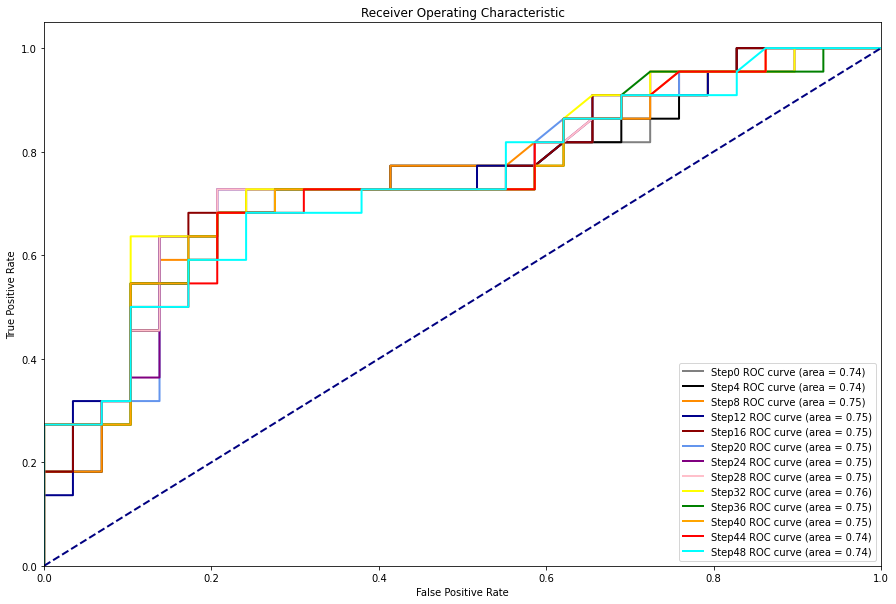

In [ ]:
plt.figure(figsize=(15,10))
lw = 2
colors = cycle(["gray", "black", "darkorange","darkblue","darkred", "cornflowerblue", "purple", "pink", "yellow","green","orange",  "red", "aqua"])
for i, color in zip(range(0,rows,4), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label= "Step"+str(i)+" ROC curve (area = {1:0.2f})".format(i, roc_auc[i])
    )
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Compute PRC and AP for each time step

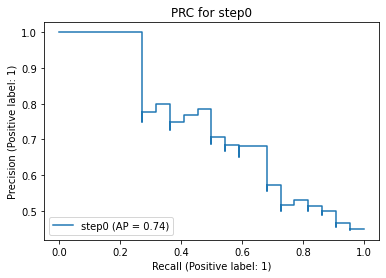

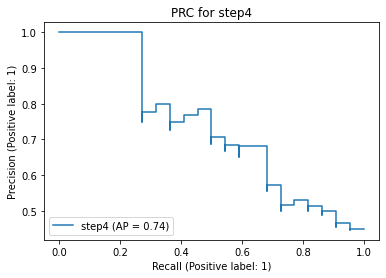

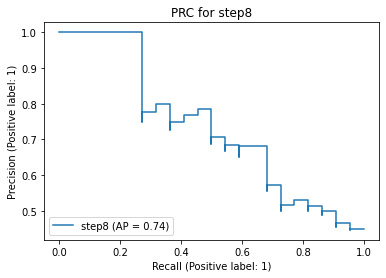

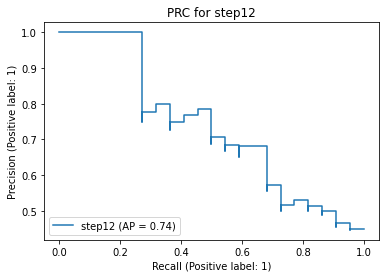

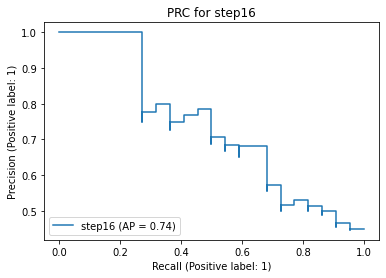

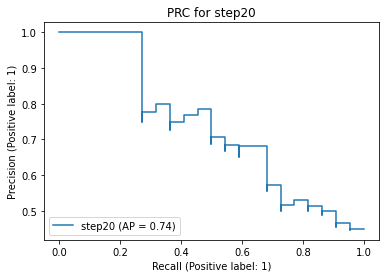

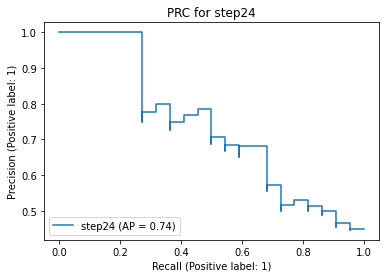

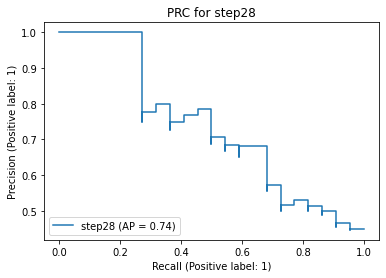

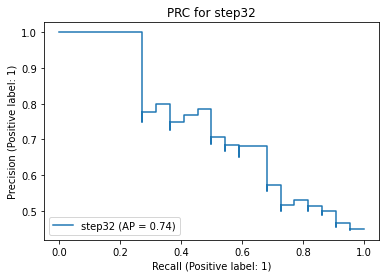

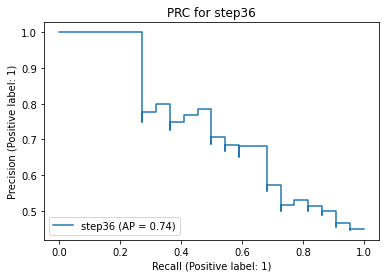

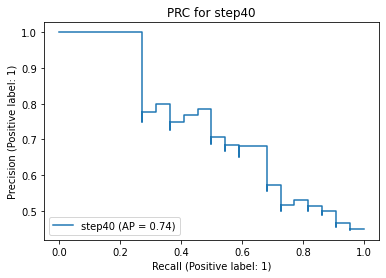

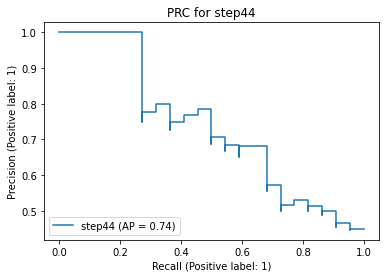

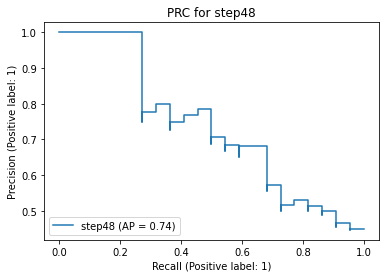

In [ ]:
# Compute PRC and AP for each time step
from sklearn.metrics import PrecisionRecallDisplay
for i in range(0,rows,4):
    display = PrecisionRecallDisplay.from_estimator(
    mlpc1[i], dummyX3, dummyY3, name="step"+str(i)
    )
    _ = display.ax_.set_title("PRC for step"+str(i))

# Analyze the overall model performance of updated model

In [ ]:
# 测试增益数据集的准确度
for i in range(0,rows,2):
    mlp = mlp.partial_fit(dummyX2[i:i+2],dummyY2[i:i+2])
    score_m = mlp.score(X_test,y_test)
    score_mm = mlp.score(dummyX2,dummyY2)
    pred_m =  mlp.predict_proba(dummyX2)
    mlpc1[i] = mlp
    mlpc2[i] = mlp.predict_proba(dummyX2)
    print(score_mm)
    #print(
    #    f"Classification report for classifier {mlp}:\n"
    #    f"{metrics.classification_report(dummyY3, predicted)}\n"
    #)

0.7843137254901961
0.803921568627451
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7450980392156863
0.7450980392156863
0.7450980392156863
0.7450980392156863
0.7450980392156863
0.7450980392156863
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7843137254901961
0.7843137254901961
0.7843137254901961
0.7843137254901961
0.7843137254901961
0.7843137254901961
0.7843137254901961
0.7450980392156863


c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\christopher\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\christopher\appdata\local

# Compute ROC curve and ROC area for each time step of updated model

In [ ]:
# Compute ROC curve and ROC area for each step
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,rows,4):
    fpr[i], tpr[i], _ = roc_curve(dummyY2.squeeze(),mlpc2[i][:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

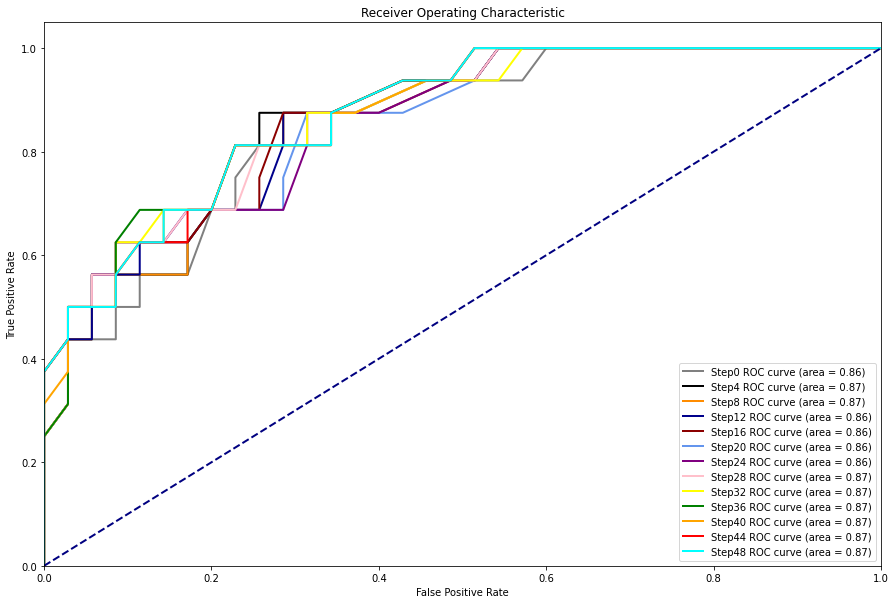

In [ ]:
plt.figure(figsize=(15,10))
lw = 2
colors = cycle(["gray", "black", "darkorange","darkblue","darkred", "cornflowerblue", "purple", "pink", "yellow","green","orange",  "red", "aqua"])
for i, color in zip(range(0,rows,4), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label= "Step"+str(i)+" ROC curve (area = {1:0.2f})".format(i, roc_auc[i])
    )
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Compute PRC and AP for each time step of updated model

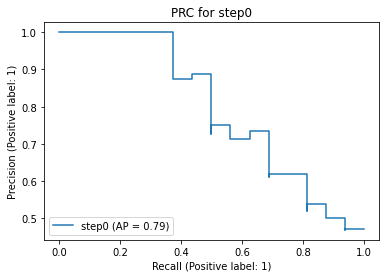

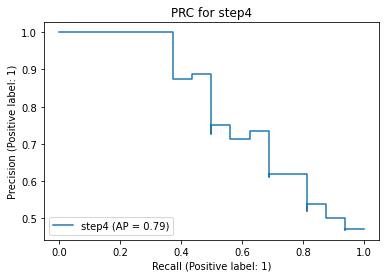

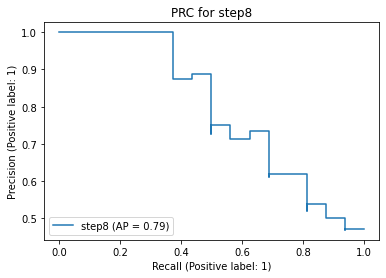

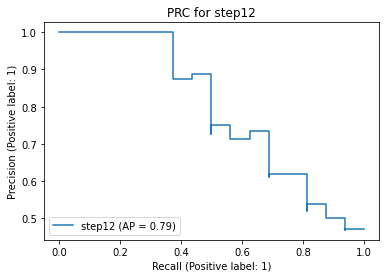

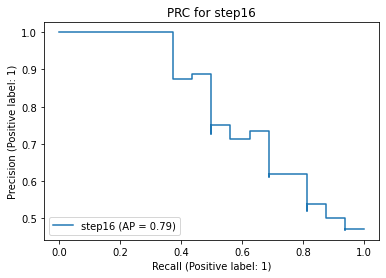

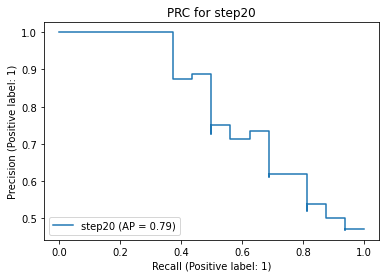

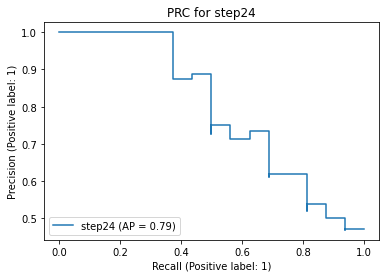

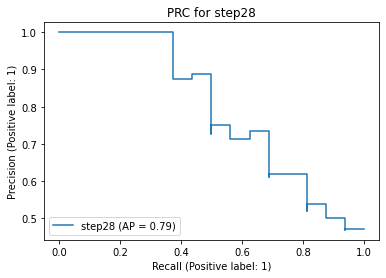

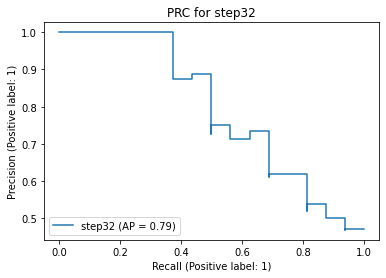

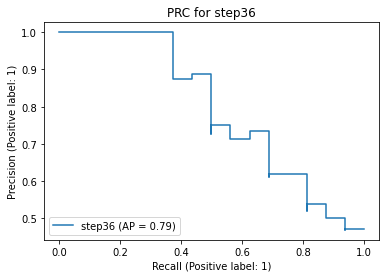

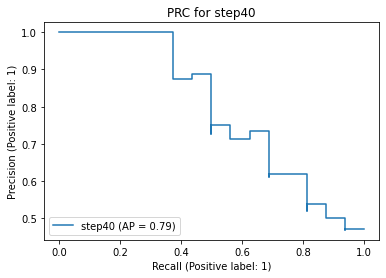

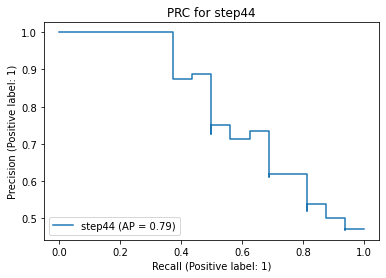

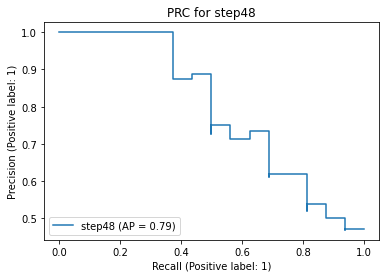

In [ ]:
# Compute PRC and AP for each step
for i in range(0,rows,4):
    display = PrecisionRecallDisplay.from_estimator(
    mlpc1[i], dummyX2, dummyY2, name="step"+str(i)
    )
    _ = display.ax_.set_title("PRC for step"+str(i))